In [1]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)
    
def plotScatter(points):
    xs = [x[0] for x in points]
    ys = [y[1] for y in points]
    
    plt.scatter(xs, ys)

In [2]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def loss(weights):
    predictions = logisticPrediction(weights, points)
    w = np.full((len(predictions)), np.log(1/2)) # CONSTANT
    r = responsibility(weights, points)
    return -(1/len(points)) * np.sum(r *((targets*np.log(predictions) + (1-targets)*np.log(1-predictions))))

def logisticPrediction(weights, p):
    return np.array(list(map(lambda x: predict(weights, x), p))) 
    
def predict(weights, inputs):
    n = np.array([weights[0], weights[1]])
    i = np.array([weights[2] - inputs[0], weights[3] - inputs[1]])
    return sigmoid(np.dot(n, i))

def responsibility(weights, points):
    r = weights[4]
    a = np.array([weights[2], weights[3]])
    
    dif = np.array(list(map(lambda x: x - a, points)))
    s = np.array(list(map(lambda x: np.sum(np.power(x, 2)), dif)))
    d = np.sqrt(s)
#     print(d)
    t = 1-f(d, r)
#     print(t)

    return t

def f(d, r):
    return 1/(1 + np.power(np.e, 10*(d-r)))
#     return np.power(np.e, -(1.0/15.0) * np.power(d/r, 2))
#     return np.maximum(d - r, 0)/(np.abs(d - r) + 0.1)

In [3]:
def trainBoundaryHunter():
#     weights = np.array([0.0, 0.0, 0.0, 0.0, 0.3])
    weights = np.random.rand(5)
    weights[4] = 0.5
    gradient = grad(loss)
    print("Initial Loss: ", loss(weights))
    for i in range(0, 10000):
        g = gradient(weights)
        
        if i % 1000 == 0:
            print("Loss [i = " + str(i) + "]: " + str(loss(weights)))
            print(weights)
            checkGrad(0.00001, 0.0001, weights, g)
        
        dL_dr = numericGrad(0.1, weights)[4]
#         print(str(dL_dr) + " -> " + str(loss(weights)))
        g[4] = -dL_dr
        
        weights -= 0.01 * g
            
    print("Trained Loss: ", loss(weights))    
    print("Weights: ", weights)
    return weights

def checkGrad(pterb, threshold, weights, g):
    grad = numericGrad(pterb, weights)
        
    dif = np.absolute(g - grad)
    for d in dif:
        if d > threshold:
            print("ERROR")
    
    
def numericGrad(pterb, weights):
    grad = np.zeros(len(weights))
    for i in range(0, len(weights)):
        p = np.zeros(len(weights))
        p[i] = pterb
        
        lossBefore = loss(weights)
        lossAfter = loss(weights + p)
        
        grad[i] = (lossAfter - lossBefore)/pterb
        
    return grad

Type 0:  35
Type 1:  65
Initial Loss:  0.618508003712
Loss [i = 0]: 0.618508003712
[ 0.03162182  0.26835171  0.58032248  0.37263115  0.5       ]
Loss [i = 1000]: 0.49781445166
[ 0.36422635 -1.07292656  0.80034753 -0.24360724 -0.27996243]
Loss [i = 2000]: 0.383211113561
[ 0.0523406  -2.03077965  0.85313713 -0.51420695 -0.3347515 ]
Loss [i = 3000]: 0.337694045116
[-0.21652675 -2.64392384  0.85544218 -0.56365542 -0.37346808]
Loss [i = 4000]: 0.314352811563
[-0.39808998 -3.08990415  0.85745    -0.58533148 -0.40326828]
Loss [i = 5000]: 0.300492442035
[-0.52973414 -3.43753038  0.85979297 -0.59738504 -0.42714031]
Loss [i = 6000]: 0.291461711743
[-0.63105551 -3.72023921  0.86224423 -0.6051395  -0.44697386]
Loss [i = 7000]: 0.285199093544
[-0.71259077 -3.95680507  0.86465977 -0.6106644  -0.46391784]
Loss [i = 8000]: 0.280658948382
[-0.78040384 -4.15885412  0.86697648 -0.61489957 -0.47870319]
Loss [i = 9000]: 0.277256794051
[-0.83821032 -4.33410498  0.86917258 -0.61832142 -0.49181834]
Trained Lo

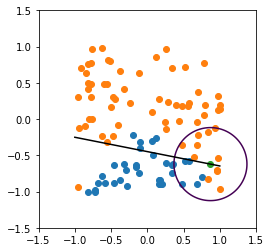

In [4]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

weights = trainBoundaryHunter()

plt.scatter(weights[2], weights[3])

n = np.array([weights[0] * weights[2] + weights[1] * weights[3], 
              -weights[0], 
              -weights[1]])

byas = -1 * n[0]/n[2]
Xcoef = -1 * n[1]/n[2]

x = np.linspace(-1.5, 1.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x,y)
F = ((X - weights[2]))**2 + ((Y - weights[3]))**2 - weights[4]**2
plt.contour(X,Y,F,[0])

print()
print(n)
print("\nLine")
print("B: " + str(byas))
print("XCoef: " + str(Xcoef))

plt.plot([-1.0, 1.0], [-1*Xcoef + byas, Xcoef + byas], 'k-')
plt.gca().set_aspect('equal')

plt.show()